In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statistics import mean
import pandas.io.formats.format as pf

In [28]:
data=pd.read_excel("C:/Users/shafi/Downloads/Sales_data_zone_wise.xlsx")

In [29]:
data.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [30]:
data.tail()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
24,Month - 25,1256333,1622671,1521792,1695122
25,Month - 26,1422853,1715465,1853636,1520406
26,Month - 27,1384426,1983163,1611169,1289160
27,Month - 28,1616640,1547991,2128022,2178267
28,Month - 29,1310654,1660092,1947119,1854412


# ● The mean sales generated by each zone

In [31]:
 pd.set_option('float_format', '{:,.2f}'.format)

In [32]:
data_descibe=data.describe()

In [33]:
data_descibe

,Zone - A,Zone - B,Zone - C,Zone - D
count,29.00,29.00,29.00,29.00
mean,"1,540,493.14","1,755,559.59","1,772,871.03","1,842,926.76"
std,"261,940.06","168,389.89","333,193.72","375,016.48"
min,"1,128,185.00","1,527,574.00","1,237,722.00","1,234,311.00"
25%,"1,305,972.00","1,606,010.00","1,523,308.00","1,520,406.00"
50%,"1,534,390.00","1,740,365.00","1,767,047.00","1,854,412.00"
75%,"1,820,196.00","1,875,658.00","2,098,463.00","2,180,416.00"
max,"2,004,480.00","2,091,194.00","2,290,580.00","2,364,132.00"


In [34]:
data_descibe.iloc[1]

Zone - A   1,540,493.14
Zone - B   1,755,559.59
Zone - C   1,772,871.03
Zone - D   1,842,926.76
Name: mean, dtype: float64

# ● Total sales generated by all the zones for each month.

In [35]:
data['Sum_of_sales']= data.loc[0 :28,['Zone - A','Zone - B','Zone - C','Zone - D']].sum(axis=1)

In [36]:
data_total=data[['Month','Sum_of_sales']]

In [37]:
data_total

,Month,Sum_of_sales
0,Month - 1,7022544
1,Month - 2,7152303
2,Month - 3,6475939
3,Month - 4,8174449
4,Month - 5,5995328
5,Month - 6,7151387
6,Month - 7,7287108
7,Month - 8,7816299
8,Month - 9,6703395
9,Month - 10,7128210


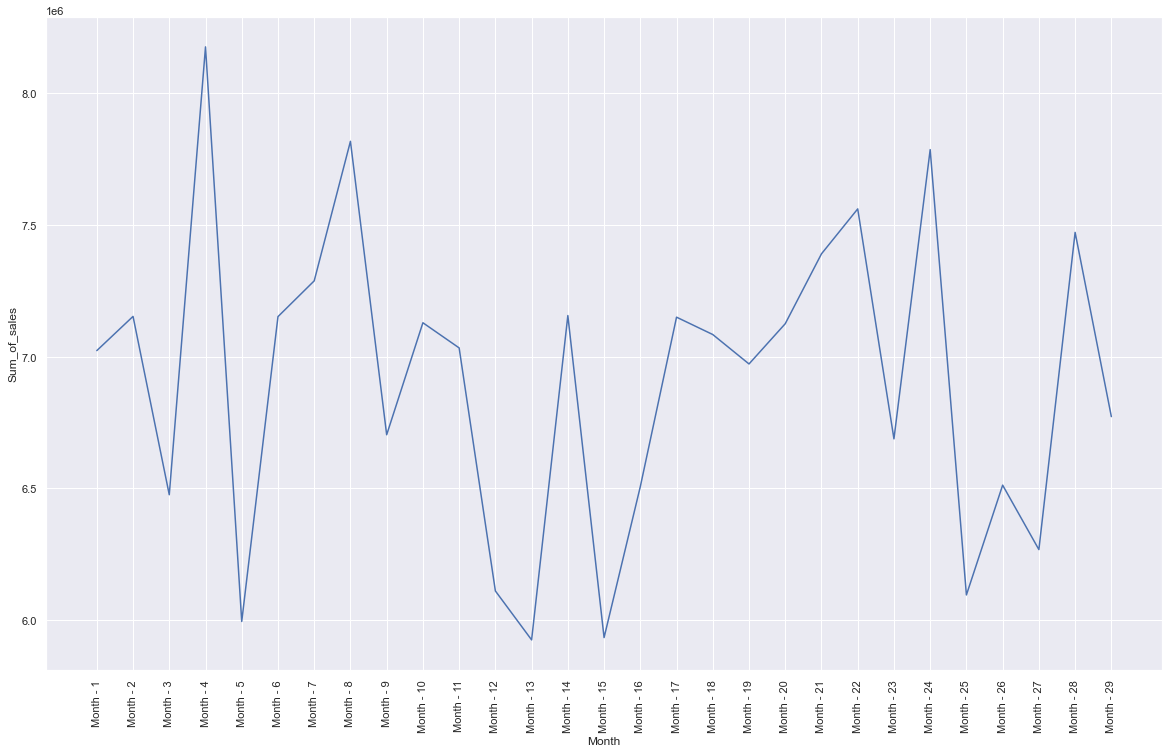

In [38]:
sns.lineplot(data=data_total, x="Month", y="Sum_of_sales")
sns.set(rc = {'figure.figsize':(20,12)})
plt.xticks(rotation=90);

# ● Check whether all the zones generate the same amount of sales.


Null Hypothesis H0-The mean of the sales generated by the four zones are equal.          
Alternate Hypothesis H1-The mean of the sales generated by the four zones are not equal.

In [39]:
f,p=stats.f_oneway(data['Zone - A'],data['Zone - B'],data['Zone - C'],data['Zone - D'])

print('F-statistic=',f)
print('p-value=',p)

F-statistic= 5.672056106843581
p-value= 0.0011827601694503335


In [40]:
print('F-statistic=',round(f,3))
print('p-value=',round(p,3))

F-statistic= 5.672
p-value= 0.001


In [41]:
if p<0.05:
    print('Reject null Hypothesis.')
else:
    print('Accept null hypothesis.')

Reject null Hypothesis.


# So the mean of the sales generated by the four zones are not equal.

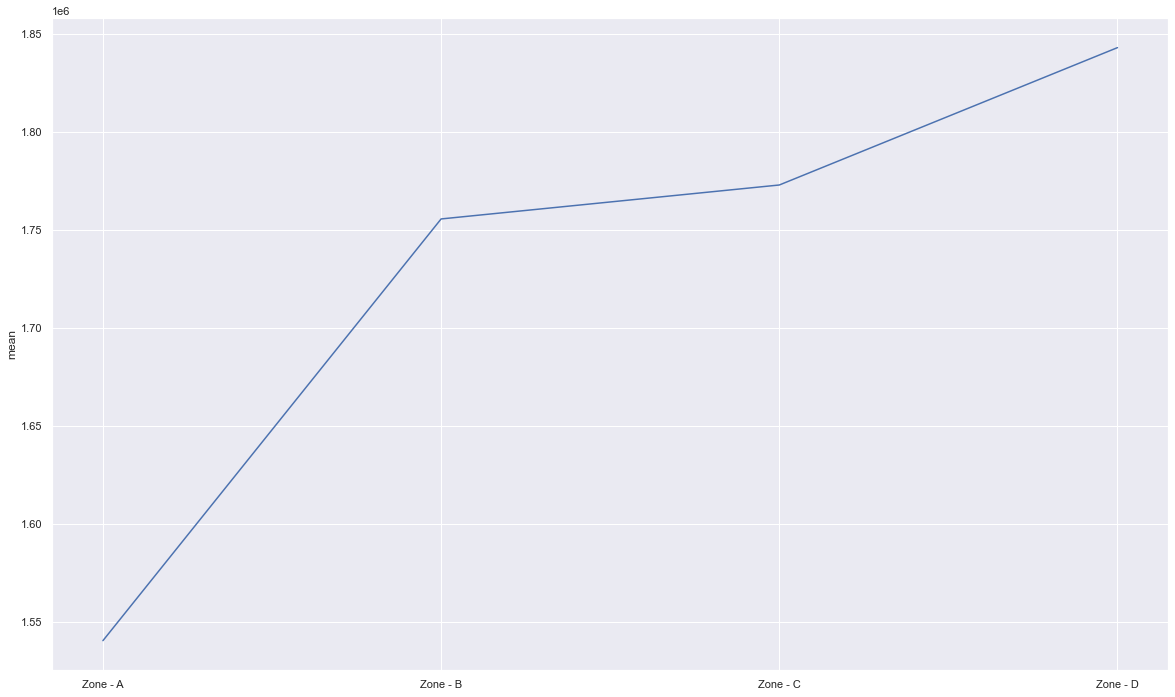

In [26]:
sns.lineplot(data=data_descibe.iloc[1]);